# Laboratorio 1 - Inteligencia de negocios

**Caso de Negocio:** 
FutAlpes F.C.

**Integrantes:**
- Estudiante 1: David Elias Forero
- Estudiante 2: Jeronimo A. Pineda Cano
- Estudiante 3: Juan Felipe Hernández

**Fecha:** 30 agosto

# Paso 0: Introducción, Objetivos Generales y configuración inicial

FutAlpes F.C. necesita optimizar su estrategia de fichajes con un presupuesto de 100 millones de euros. Para ello, se requiere construir un modelo de regresión que prediga el valor de mercado de un jugador basándose en sus estadísticas de rendimiento de la temporada 2024/2025, con el fin de tomar decisiones de contratación más objetivas y eficientes.

## 0.1 Objetivos generales
- Construir un modelo de regresión para estimar el valor de mercado de los jugadores a partir de sus estadísticas.
- Identificar las variables de rendimiento que más influyen en el precio de un futbolista.
- Implementar un pipeline automatizado que procese los datos y genere predicciones para su uso en producción.
- Evaluar la precisión y fiabilidad del modelo para justificar su uso como herramienta de apoyo en la selección de fichajes.

## 0.2 Librerias

In [1]:
%pip install pandas matplotlib seaborn scikit-learn ydata-profiling setuptools ipywidgets openpyxl

Note: you may need to restart the kernel to use updated packages.


## 0.3 Cofiguración inicial

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [3]:
file_train_data='data/datos_entrenamiento_laboratorio1(train_data).csv'
file_test_data='data/datos_entrenamiento_laboratorio1(test_data).csv'
file_dictionary_data='data/Diccionario de datos.xlsx'

df_train = pd.read_csv(file_train_data)
df_train.head()

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


# Paso 1: Entendimiento de Datos
## 1.1 Revisión del diccionario de datos


### 1.1.1 Nombre de cada columna

In [4]:
list(df_train.columns)

['Jugador',
 'Nacionalidad',
 'Posicion',
 'Edad',
 'Dia_partido',
 'Goles',
 'Tiros Totales',
 'xG',
 'npxG',
 'xAG',
 'xAG.1',
 'Acciones_que_crean_tiros',
 'Pases_intentados',
 'Pases_intentados.1',
 'Pases_intentados.2',
 'Pases_progresivos',
 'Pases_progresivos.1',
 'Regates_exitosos',
 'Regates_exitosos.1',
 'Pases_medios_completados',
 'Pases_largos_completados',
 'xAG.2',
 'xAG.3',
 'xA',
 'Pases_en_ultimo_tercio',
 'Pases_balon_vivo',
 'Pases_balon_muerto',
 'Pases_al_hueco',
 'Pases_centros',
 'Pases_completados',
 'Pases_completados.1',
 'Pases_completados.2',
 'Pases_fuera_de_juego',
 'Valla_no_vencida',
 'Errores_defnsivos_ocasion_tiro',
 'Toques_en_zona_ofensiva',
 'Toques_en_area_rival',
 '%_de_regates_exitosos',
 'Veces_que_fue_barrido_regate',
 'Acarreos_ultimo_tercio',
 'Malos_controles',
 'Perdida_balon',
 'Pases_recibidos',
 'Pases_progresivos_recibidos',
 'Faltas_cometidas',
 'Centros',
 'Duelos_aereos_ganados',
 '%_de_duelos_aereos_ganados',
 'market_value',
 'con

### 1.1.2 Definición según el diccionario

In [5]:
df_dictionary = pd.read_excel(file_dictionary_data)
df_dictionary.head(100)

,Columna,Tipo,Descripción
0,Jugador,Texto,Nombre del jugador de fútbol.
1,Nacionalidad,Texto,País de origen del jugador.
2,Posicion,Texto,"Posición en el campo (ej. Defensa, Delantero, ..."
3,Edad,Entero,Edad del jugador en años.
4,Dia_partido,Fecha / Texto,Día en que se disputó el partido.
5,Goles,Entero,Número de goles anotados en el partido.
6,Tiros Totales,Entero,Total de tiros intentados (a puerta + fuera).
7,xG,Float,Goles esperados (Expected Goals).
8,npxG,Float,Goles esperados sin penales.
9,xAG,Float,Asistencias de goles esperadas (Expected Assis...


### 1.1.4 Ambigüedades detectadas:
- La Posicion no dice que hay jugadores con mas de una posición posible por partido.
- La nacionalidad no indica el formato utilizado.
- La descripción de la edad no indica el formato utilizado.
- Hay jugadores sin edad.
- La descripción del market value no dice que formato se utiliza.
- El market value no indica que significan filas con valor '-' o 'error'.
- Hay jugadores sin market_value
- Hay muchas columnas repetidas con la misma información.

## 1.2 Contextualización del dataset
### 1.2.1 Fuente de los datos (si aplica)
La fuente de los datos es el propio club de fútbol, FutAlpes F.C.


### 1.2.2 Alcance:


In [6]:
print('Jugadores únicos:',df_train['Jugador'].nunique())
print('Posiciones únicas:',df_train['Posicion'].nunique())
print('Nacionalidades únicas:',df_train['Nacionalidad'].nunique())
df_train.describe()

Jugadores únicos: 2242
Posiciones únicas: 452
Nacionalidades únicas: 110


,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados
count,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,29212.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,57934.000000,36977.000000
mean,0.513015,0.792402,0.088635,0.080473,0.062784,0.062784,1.416750,31.659716,31.659716,31.659716,2.416232,2.416232,0.487451,0.487451,11.226309,2.341941,0.062784,0.062784,0.055056,1.976232,28.593900,2.956140,0.096196,1.133652,25.745624,25.745624,25.745624,0.109677,1.502727,0.041513,9.201091,1.410950,43.171587,0.534522,0.801809,0.950133,0.574033,25.518383,2.382470,0.781337,1.133652,0.834795,48.814187
std,16.440600,1.158538,0.209810,0.186549,0.152033,0.152033,1.727395,22.963272,22.963272,22.963272,2.756341,2.756341,0.897683,0.897683,10.984869,2.867533,0.152033,0.152033,0.122355,2.583320,21.511297,3.733981,0.342576,2.005869,20.703206,20.703206,20.703206,0.345491,2.169317,0.207865,9.322087,1.957006,40.232967,0.934409,1.210875,1.221368,0.931852,19.001270,3.158174,1.005105,2.005869,1.305149,39.560765
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,28.000000,28.000000,2.000000,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,24.000000,1.000000,0.000000,0.000000,21.000000,21.000000,21.000000,0.000000,1.000000,0.000000,7.000000,1.000000,42.900000,0.000000,0.000000,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.000000,50.000000
75%,0.000000,1.000000,0.100000,0.100000,0.100000,0.100000,2.000000,45.000000,45.000000,45.000000,4.000000,4.000000,1.000000,1.000000,16.000000,3.000000,0.100000,0.100000,0.100000,3.000000,40.000000,4.000000,0.000000,1.000000,37.000000,37.000000,37.000000,0.000000,2.000000,0.000000,14.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,36.000000,4.000000,1.000000,1.000000,1.000000,100.000000
max,995.000000,12.000000,2.900000,2.900000,2.100000,2.100000,16.000000,171.000000,171.000000,171.000000,30.000000,30.000000,15.000000,15.000000,95.000000,24.000000,2.100000,2.100000,1.400000,37.000000,170.000000,35.000000,8.000000,25.000000,163.000000,163.000000,163.000000,5.000000,21.000000,3.

### 1.2.3 Limitaciones
- No hay información médica que pueda aportar al precio de un jugador.
- No incluye el estado del contrato (duración, salario, ...)
- No aparecen datos financieros del club.
- No hay métricas de impacto social (redes sociales, menciones en prensa, ...)
- No se consideran logros colectivos e ndividuales.
- No hay información sobre disciplina, liderazgo, comportamiento fuera de la cancha, adaptación cultural o idiomas, que pueden afectar fichajes.

# Paso 2: Proceso de Selección de Variables (5%)
## 2.1 Justificación de la Variable Objetivo
La variable objetivo (target) para este proyecto es market_value, ya que su predicción responde directamente al objetivo de FutAlpes F.C. de optimizar su estrategia de fichajes con un presupuesto de 100 millones de euros. Estimar el valor de mercado de un jugador a partir de sus estadísticas de rendimiento permitirá al club evaluar si los precios de las negociaciones son justos, identificar futbolistas potencialmente subvalorados y fundamentar las decisiones de contratación en un análisis de datos objetivo, reduciendo así la incertidumbre y la dependencia de la intuición.

## 2.2 Justificación de Inclusión/Exclusión de Variables Predictoras
### 2.2.1 Variables seleccionadas: Explica, una por una, por qué tiene sentido que esa variable ayude a predecir tu target.


- Nacionalidad: puede influir en el valor por cupos de extranjeros, mercadeo y visibilidad internacional.
- Posicion: fundamental, ya que cada rol en el campo tiene distinta demanda y valor.

- Edad: factor clave en el precio (jóvenes tienen más proyección; veteranos tienden a depreciarse).

- Goles: impacto directo en la valoración de atacantes.

- Tiros Totales: refleja volumen ofensivo; jugadores con muchos tiros suelen ser más valiosos.

- xG: mide calidad de las oportunidades generadas, mejor predictor que goles brutos.

- npxG: separa el impacto de penales, dando una visión más real del rendimiento.

- xAG: mide la calidad de asistencias potenciales, refleja creación de ocasiones.

- Acciones_que_crean_tiros: mide contribución directa en generación ofensiva.

- Pases_progresivos: relevantes para evaluar capacidad de avanzar el juego.

- Regates_exitosos: reflejan habilidad individual en 1vs1, factor clave en el valor de extremos y delanteros.

- Pases_medios_completados: aportan en la construcción de juego en zona media.

- Pases_largos_completados: indican visión y capacidad de cambio de juego.

- xA: mide asistencias esperadas, refleja creación de oportunidades de gol.

- Pases_en_ultimo_tercio: muy relevantes para medir influencia en zonas de mayor peligro.

- Pases_balon_vivo: aportan al juego dinámico en desarrollo de jugadas.

- Pases_al_hueco: clave para medir visión de ataque y generación de ocasiones.

- Pases_centros: relevantes para laterales/extremos, que aportan volumen ofensivo.

- Pases_completados: indicador de seguridad en la distribución del balón.

- Pases_fuera_de_juego: puede reflejar intención ofensiva; usado como ajuste.

- Valla_no_vencida: métrica relevante para arqueros (portería imbatida).

- Errores_defnsivos_ocasion_tiro: penaliza a defensores/porteros, afecta el valor.

- Toques_en_zona_ofensiva: mide presencia en campo contrario, indicador de influencia ofensiva.

- Toques_en_area_rival: fundamental para delanteros, muestra actividad en el área rival.

- %_de_regates_exitosos: mide eficiencia en duelos ofensivos.

- Veces_que_fue_barrido_regate: muestra capacidad de superar rivales, complemento del regate.

- Acarreos_ultimo_tercio: refleja conducción y generación de peligro avanzando con balón.

- Malos_controles: errores técnicos que influyen negativamente en el valor.

- Perdida_balon: mide seguridad en posesión, inversamente relacionado con valoración.

- Pases_recibidos: indicador de participación en el juego.

- Pases_progresivos_recibidos: mide capacidad de posicionarse en zonas peligrosas.

- Faltas_cometidas: afecta negativamente, pero relevante para disciplina del jugador.

- Centros: aportan creación de ocasiones por bandas.

- Duelos_aereos_ganados: clave en valoración de defensores y delanteros de referencia.

- %_de_duelos_aereos_ganados: mide eficiencia en el juego aéreo.

### 2.2.2 Variables descartadas: Lista las variables que NO usas, y justifica por qué (irrelevante, duplicada, correlacionada, sólo identificador, etc.).

- Jugador: identificador único, no tiene poder predictivo.

- Dia_partido: fecha puntual, no aporta directamente al valor de mercado.

- Pases_intentados (repetido tres veces): duplicado en dataset, se descartan instancias repetidas para evitar multicolinealidad.

- Regates_exitosos (aparece dos veces): se descarta duplicado, se conserva una sola instancia.

- xAG (aparece tres veces): se descartan duplicados, se conserva solo una versión.

- Pases_completados (aparece tres veces): se descartan duplicados, se conserva solo una versión.

- market_value: es la variable objetivo (target), no puede usarse como predictor.

- contract_date: puede influir en la vida real, pero en este dataset es poco confiable (formato irregular o incompleto).

**Nota:** Si posteriormente se detecta que alguna variable incluida genera multicolinealidad o es irrelevante estadísticamente, se reconsiderará su exclusión en la fase de exploración estadística.

# Paso 3: Preparación y Limpieza de Datos (15%) (Estudiante 3)


## 3.1 Completitud
Detección de nulos: Para cada columna, muestra cuántos valores están vacíos/nulos.
Proporciones y distribución: ¿Qué porcentaje representan? ¿Están distribuidos aleatoriamente o concentrados?
Tratamiento: ¿Qué hiciste con los nulos? ¿Imputación, eliminación, alguna lógica especial? ¡Justifica!


In [7]:
# Muestra las columnas con valores nulos y la cantidad de nulos en cada una
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Nacionalidad                     32
Edad                             48
%_de_regates_exitosos         28722
%_de_duelos_aereos_ganados    20957
market_value                  12894
contract_date                 12916
dtype: int64

Para obtener una mejor decisión de que hacer con la columna de market_value, la limpiaremos. Para esto se eliminaran las columnas con error en el market_value, se guardaran con 0 las que tienen '-' y se guardaran con None las que están vacias.

In [8]:
df_train = df_train[df_train["market_value"] != "error"]

def market_value(val):
    if val=='-':
        return 0
    if pd.isna(val):
        return None
    
    val = val.strip().lower()
    
    if val.startswith("€") and (val.endswith("m") or val.endswith("k")):
        val = val.replace("€", "").strip()
        
        if val.endswith("m"):
            return float(val[:-1])
        elif val.endswith("k"):
            return float(val[:-1]) / 1000
    else:
        return None

df_train["market_value_million_eur"] = df_train["market_value"].apply(market_value)
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Nacionalidad                     32
Edad                             48
%_de_regates_exitosos         28697
%_de_duelos_aereos_ganados    20940
market_value                  12894
contract_date                 12905
market_value_million_eur      12894
dtype: int64

In [9]:
df_train = df_train.drop(columns=["market_value"],axis=1)

- Los jugadores (diferente de partidos) sin market_value y sin edad no aportan, deben ser eliminados.
- El %_de_regates_exitosos y %_de_duelos_aereos_ganados deben ser imputados debido a que no es lo mismo un jugador que nunca intentó una de estas acciones que un jugador que intentó y nínguna vez fue exitosa.

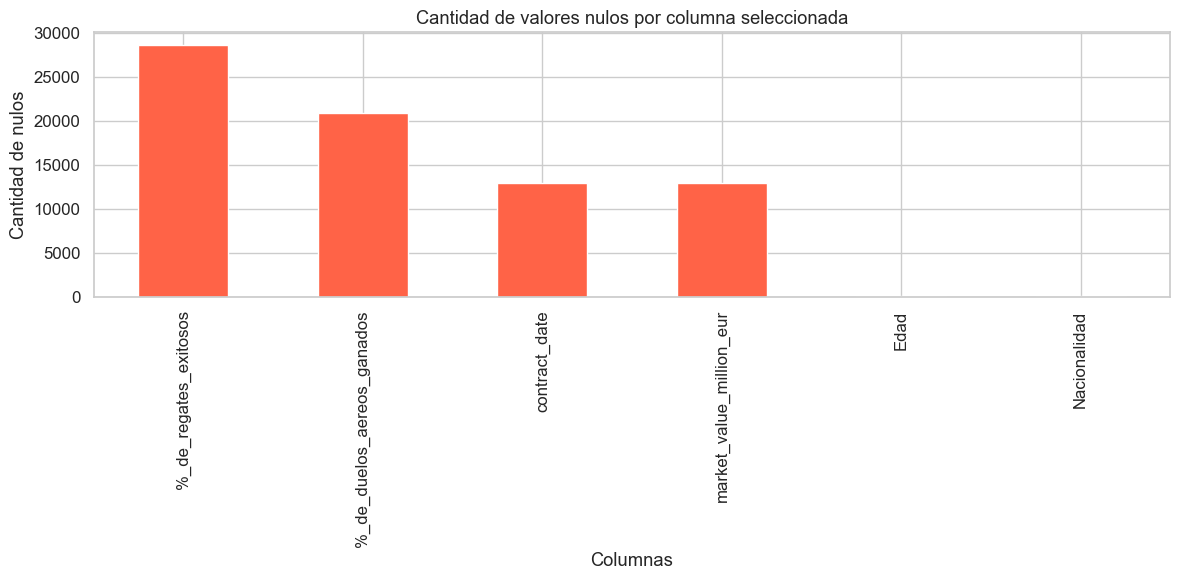

In [10]:
cols_interes = ['Nacionalidad', 'Edad', '%_de_regates_exitosos', '%_de_duelos_aereos_ganados', 'market_value_million_eur', 'contract_date']
nulos = df_train[cols_interes].isnull().sum()

# Graficar
plt.figure(figsize=(12,6))
nulos.sort_values(ascending=False).plot(kind="bar", color="tomato")
plt.title("Cantidad de valores nulos por columna seleccionada")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de nulos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- La cantidad de registros sin market_value es muy grande, esto puede resultar en la eliminación de muchas filas tras una transformación de partidos a jugadores.
- La posible justificación de pq los nulos en los % son muy altos se deben a que algunas variables están muy relacionadas con la posición del jugador.

**Nota:** No se harán inputaciones ni eliminación de datos hasta el próximo paso.

## 3.2 Unicidad
### 3.2.1 Duplicados exactos


In [11]:
def duplicados():
    duplicados_group = df_train[df_train.duplicated(keep=False)]
    num_grupos = duplicados_group.drop_duplicates().shape[0]
    print(f"Número de grupos de filas exactamente duplicadas: {num_grupos}")
    
duplicados()

Número de grupos de filas exactamente duplicadas: 10483


Estas repeticiones no aportan información nueva al modelo, ya que representan el mismo registro duplicado por error de captura o integración de bases. Mantenerlas podría sesgar el entrenamiento, pues el modelo interpretaría estas observaciones repetidas como evidencia adicional, aumentando artificialmente el peso de dichos casos. Por esta razón, se decidió eliminar las filas duplicadas exactas, garantizando que cada registro conserve un aporte único y evitando redundancias que afecten la calidad del análisis y la construcción del modelo predictivo.

In [12]:
df_train = df_train.drop_duplicates()
duplicados()

Número de grupos de filas exactamente duplicadas: 0


### 3.2.2 Duplicados parciales:
En este caso, se define que dos registros corresponden al mismo jugador únicamente cuando el nombre coincide exactamente. Es decir, el criterio de identificación es el nombre del jugador como variable única. De esta forma, los registros con el mismo nombre se agrupan para calcular las estadísticas y evitar que se repita el market_value de un mismo jugador en el análisis. 

Primero transformamos la edad y la posición:


In [13]:
def edad(val):
    try:
        age,days = val.split('-')
        return int(age) + int(days)/365
    except:
        return None

df_train["age_years"] = df_train["Edad"].apply(edad)

def posiciones_binarias(pos):
    if pd.isna(pos):
        return {"GK":0, "DF":0, "MF":0, "FW":0}
    posiciones = [p.strip() for p in pos.split(",")]
    grupos = {"GK":0, "DF":0, "MF":0, "FW":0}

    for p in posiciones:
        if p == "GK":
            grupos["GK"] = 1
        elif p in ["DF", "CB", "LB", "RB", "WB"]:  # defensas
            grupos["DF"] = 1
        elif p in ["MF", "DM", "CM", "AM"]:  # mediocampistas
            grupos["MF"] = 1
        elif p in ["FW", "ST", "LW", "RW"]:  # delanteros
            grupos["FW"] = 1
    return grupos

# Expandir columnas
df_train = df_train.join(df_train["Posicion"].apply(posiciones_binarias).apply(pd.Series))

df_train = df_train.drop(columns=['Edad', "Posicion"],axis=1)
df_train.head()


,Jugador,Nacionalidad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,contract_date,market_value_million_eur,age_years,GK,DF,MF,FW
0,Bruno Fernandes,pt POR,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,30.06.2027,50.0,29.939726,0,0,1,1
1,Marcus Rashford,eng ENG,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,30.06.2026,50.0,26.794521,0,0,0,1
2,Amad Diallo,ci CIV,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,30.06.2027,0.0,22.098630,0,0,0,1
3,Amad Diallo,ci CIV,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,30.06.2030,1000.0,22.098630,0,0,0,1
4,Alejandro Garnacho,ar ARG,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,30.06.2028,45.0,20.126027,0,0,0,1


Ahora transformamos la nacionalidad y eliminamos los registros sin nacionalidad:

In [14]:
df_train = df_train[df_train["Nacionalidad"].notnull()]

In [15]:
top_nations = df_train["Nacionalidad"].value_counts().nlargest(20).index
df_train["nationality_grouped"] = df_train["Nacionalidad"].where(df_train["Nacionalidad"].isin(top_nations), "Other")
df_train= pd.get_dummies(df_train, columns=["nationality_grouped"], prefix="nat")

print(df_train.filter(like="nat_").head())

   nat_Other  nat_ar ARG  nat_be BEL  nat_br BRA  nat_ch SUI  nat_ci CIV  \
0      False       False       False       False       False       False   
1      False       False       False       False       False       False   
2      False       False       False       False       False        True   
3      False       False       False       False       False        True   
4      False        True       False       False       False       False   

   nat_de GER  nat_dk DEN  nat_eng ENG  nat_es ESP  nat_fr FRA  nat_gh GHA  \
0       False       False        False       False       False       False   
1       False       False         True       False       False       False   
2       False       False        False       False       False       False   
3       False       False        False       False       False       False   
4       False       False        False       False       False       False   

   nat_hr CRO  nat_it ITA  nat_ma MAR  nat_ng NGA  nat_nl NED  nat_pt POR 

In [16]:
df_train = df_train.drop(columns=["Nacionalidad"],axis=1)
df_train.head()

,Jugador,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,contract_date,market_value_million_eur,age_years,GK,DF,MF,FW,nat_Other,nat_ar ARG,nat_be BEL,nat_br BRA,nat_ch SUI,nat_ci CIV,nat_de GER,nat_dk DEN,nat_eng ENG,nat_es ESP,nat_fr FRA,nat_gh GHA,nat_hr CRO,nat_it ITA,nat_ma MAR,nat_ng NGA,nat_nl NED,nat_pt POR,nat_rs SRB,nat_se SWE,nat_sn SEN
0,Bruno Fernandes,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,30.06.2027,50.0,29.939726,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,Marcus Rashford,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,30.06.2026,50.0,26.794521,0,0,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,Amad Diallo,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,30.06.2027,0.0,22.098630,0,0,0,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Amad Diallo,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,30.06.2030,1000.0,22.098630,0,0,0,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Alejandro Garnacho,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,30.06.2028,45.0,20.126027,0,0,0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Ahora aplicamos algunos filtros para no tener en cuenta valores atípicos:

In [17]:
df_train = df_train[
    (df_train["market_value_million_eur"] >= 1) &
    (df_train["market_value_million_eur"] < 300) &
    (df_train["Goles"] >= 0) & (df_train["Goles"] <= 4) &
    (df_train["Tiros Totales"] >= 0) & (df_train["Tiros Totales"] <= 10) &
    (df_train["xG"] >= 0) & (df_train["xG"] <= 3) &
    (df_train["npxG"] >= 0) & (df_train["npxG"] <= 2.5) &
    (df_train["xAG"] >= 0) & (df_train["xAG"] <= 2) &
    (df_train["Acciones_que_crean_tiros"] >= 0) & (df_train["Acciones_que_crean_tiros"] <= 15) &
    (df_train["Pases_intentados"] >= 0) & (df_train["Pases_intentados"] <= 150) &
    (df_train["Pases_progresivos"] >= 0) & (df_train["Pases_progresivos"] <= 20) &
    (df_train["Regates_exitosos"] >= 0) & (df_train["Regates_exitosos"] <= 10) &
    (df_train["Pases_medios_completados"] >= 0) & (df_train["Pases_medios_completados"] <= 50) &
    (df_train["Pases_largos_completados"] >= 0) & (df_train["Pases_largos_completados"] <= 20) &
    (df_train["xA"] >= 0) & (df_train["xA"] <= 2) &
    (df_train["Pases_en_ultimo_tercio"] >= 0) & (df_train["Pases_en_ultimo_tercio"] <= 40) &
    (df_train["Pases_al_hueco"] >= 0) & (df_train["Pases_al_hueco"] <= 5) &
    (df_train["Pases_centros"] >= 0) & (df_train["Pases_centros"] <= 20) &
    (df_train["Pases_completados"] >= 0) & (df_train["Pases_completados"] <= 100) &
    (df_train["Valla_no_vencida"].isin([0, 1])) &
    (df_train["Errores_defnsivos_ocasion_tiro"] >= 0) & (df_train["Errores_defnsivos_ocasion_tiro"] <= 2) &
    (df_train["Toques_en_zona_ofensiva"] >= 0) & (df_train["Toques_en_zona_ofensiva"] <= 50) &
    (df_train["Toques_en_area_rival"] >= 0) & (df_train["Toques_en_area_rival"] <= 15) &
    (df_train["%_de_regates_exitosos"] >= 0) & (df_train["%_de_regates_exitosos"] <= 100) &
    (df_train["Acarreos_ultimo_tercio"] >= 0) & (df_train["Acarreos_ultimo_tercio"] <= 15) &
    (df_train["Pases_recibidos"] >= 0) & (df_train["Pases_recibidos"] <= 80) &
    (df_train["Pases_progresivos_recibidos"] >= 0) & (df_train["Pases_progresivos_recibidos"] <= 15) &
    (df_train["Centros"] >= 0) & (df_train["Centros"] <= 20) &
    (df_train["Duelos_aereos_ganados"] >= 0) & (df_train["Duelos_aereos_ganados"] <= 15) &
    (df_train["%_de_duelos_aereos_ganados"] >= 0) & (df_train["%_de_duelos_aereos_ganados"] <= 100) &
    (df_train["age_years"] >= 16) & (df_train["age_years"] <= 40)
]

Para consolidar la información a nivel de jugador, se definió un diccionario de agregación (agg_dict) que aplica diferentes funciones según la naturaleza de cada variable.

In [18]:
agg_dict = {
    "Jugador": "first",
    
    # Rendimiento ofensivo
    "Goles": "sum",
    "Tiros Totales": "sum",
    "xG": "sum",
    "npxG": "sum",
    "xAG": "sum",
    "xA": "sum",
    "Acciones_que_crean_tiros": "sum",
    
    # Pases
    "Pases_progresivos": "sum",
    "Pases_medios_completados": "sum",
    "Pases_largos_completados": "sum",
    "Pases_en_ultimo_tercio": "sum",
    "Pases_balon_vivo": "sum",
    "Pases_balon_muerto": "sum",
    "Pases_al_hueco": "sum",
    "Pases_centros": "sum",
    "Pases_completados": "sum",
    "Pases_fuera_de_juego": "sum",
    
    # Acciones defensivas y errores
    "Valla_no_vencida": "sum",
    "Errores_defnsivos_ocasion_tiro": "sum",
    "Faltas_cometidas": "sum",
    "Duelos_aereos_ganados": "sum",
    "Veces_que_fue_barrido_regate": "sum",
    
    # Toques y posesión
    "Toques_en_zona_ofensiva": "sum",
    "Toques_en_area_rival": "sum",
    "Pases_recibidos": "sum",
    "Pases_progresivos_recibidos": "sum",
    "Acarreos_ultimo_tercio": "sum",
    "Regates_exitosos": "sum",
    "Malos_controles": "sum",
    "Perdida_balon": "sum",
    "Centros": "sum",
    
    "%_de_regates_exitosos": "mean",
    "%_de_duelos_aereos_ganados": "mean",
    
    "market_value_million_eur": "max",
    "age_years": "max",
    
    # Variables dummy de posición
    "GK": "max",
    "DF": "max",
    "MF": "max",
    "FW": "max",
    
    # Variables dummy de nacionalidad
    "nat_Other": "max",
    "nat_ar ARG": "max",
    "nat_be BEL": "max",
    "nat_br BRA": "max",
    "nat_ch SUI": "max",
    "nat_ci CIV": "max",
    "nat_de GER": "max",
    "nat_dk DEN": "max",
    "nat_eng ENG": "max",
    "nat_es ESP": "max",
    "nat_fr FRA": "max",
    "nat_gh GHA": "max",
    "nat_hr CRO": "max",
    "nat_it ITA": "max",
    "nat_ma MAR": "max",
    "nat_ng NGA": "max",
    "nat_nl NED": "max",
    "nat_pt POR": "max",
    "nat_rs SRB": "max",
    "nat_se SWE": "max",
    "nat_sn SEN": "max"
}

agg_dict = {col: rule for col, rule in agg_dict.items() if col in df_train.columns}

df_player = df_train.groupby("Jugador", as_index=False).agg(agg_dict)

print('Tamaño',df_player.shape)
df_player.head()

Tamaño (1063, 61)


,Jugador,Goles,Tiros Totales,xG,npxG,xAG,xA,Acciones_que_crean_tiros,Pases_progresivos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Faltas_cometidas,Duelos_aereos_ganados,Veces_que_fue_barrido_regate,Toques_en_zona_ofensiva,Toques_en_area_rival,Pases_recibidos,Pases_progresivos_recibidos,Acarreos_ultimo_tercio,Regates_exitosos,Malos_controles,Perdida_balon,Centros,%_de_regates_exitosos,%_de_duelos_aereos_ganados,market_value_million_eur,age_years,GK,DF,MF,FW,nat_Other,nat_ar ARG,nat_be BEL,nat_br BRA,nat_ch SUI,nat_ci CIV,nat_de GER,nat_dk DEN,nat_eng ENG,nat_es ESP,nat_fr FRA,nat_gh GHA,nat_hr CRO,nat_it ITA,nat_ma MAR,nat_ng NGA,nat_nl NED,nat_pt POR,nat_rs SRB,nat_se SWE,nat_sn SEN
0,Aaron Martin,0,4,0.1,0.1,1.0,1.1,20,14,90,20,10,184,80,0,57,179,1,4,1,6,0,4,128,8,163,29,5,4,5,3,57,36.116667,0.000000,6.5,27.950685,0,1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,Aaron WanBissaka,0,2,0.0,0.0,0.5,0.6,13,21,45,4,11,200,23,3,14,178,0,3,0,6,1,6,89,10,152,27,7,7,6,2,14,41.975000,8.325000,24.0,27.435616,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,Abakar Sylla,0,0,0.0,0.0,0.0,0.0,1,0,11,3,0,24,9,0,0,30,0,0,0,3,1,0,3,0,20,0,0,1,1,0,0,100.000000,100.000000,10.0,21.649315,0,1,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abdallah Sima,2,15,2.0,2.0,0.7,0.5,15,15,28,3,3,156,4,0,6,110,0,3,0,9,20,11,123,37,181,41,8,5,24,8,6,23.330000,64.290000,9.0,23.821918,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,Abde Ezzalzouli,0,39,5.3,4.5,1.1,1.0,44,45,91,9,28,511,18,2,38,379,0,10,0,15,18,29,407,104,541,147,52,35,41,36,38,44.127273,36.436364,12.0,23.430137,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [19]:
df_player.isnull().sum()[df_player.isnull().sum() > 0]

Series([], dtype: int64)

In [20]:
df_player.describe()

,Goles,Tiros Totales,xG,npxG,xAG,xA,Acciones_que_crean_tiros,Pases_progresivos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Faltas_cometidas,Duelos_aereos_ganados,Veces_que_fue_barrido_regate,Toques_en_zona_ofensiva,Toques_en_area_rival,Pases_recibidos,Pases_progresivos_recibidos,Acarreos_ultimo_tercio,Regates_exitosos,Malos_controles,Perdida_balon,Centros,%_de_regates_exitosos,%_de_duelos_aereos_ganados,market_value_million_eur,age_years,GK,DF,MF,FW
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,1.225776,10.452493,1.243556,1.117780,0.745061,0.647695,16.554092,21.365005,65.295390,12.626529,15.065851,203.253998,17.278457,1.166510,12.234243,174.492004,0.963311,2.774224,0.236124,7.317027,7.591722,8.739417,108.919097,19.031985,199.912512,30.617121,9.105362,7.545626,12.026341,7.679210,12.234243,42.600391,43.579042,18.411383,25.889522,0.004704,0.387582,0.521167,0.478833
std,2.333699,13.953088,2.106629,1.854687,1.038202,0.906605,18.948206,24.710306,68.238747,16.127398,18.257248,196.189653,21.415660,2.219484,19.551821,169.706903,1.610807,2.583049,0.558897,7.835897,10.470333,10.577524,120.009608,25.783484,193.923556,38.269354,10.816053,8.825550,14.939592,10.423139,19.551821,25.005104,25.129344,22.987066,3.951818,0.068454,0.487428,0.499787,0.499787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.767123,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.100000,0.100000,0.050000,0.100000,4.000000,6.000000,23.000000,3.000000,4.000000,69.000000,4.000000,0.000000,1.000000,63.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,27.000000,3.000000,64.500000,5.000000,2.000000,2.000000,2.000000,1.000000,1.000000,27.772222,27.576190,4.000000,22.889041,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,0.400000,0.400000,0.400000,0.300000,10.000000,14.000000,47.000000,8.000000,10.000000,147.000000,10.000000,0.000000,5.000000,128.000000,0.000000,2.000000,0.000000,5.000000,4.000000,5.000000,69.000000,8.000000,142.000000,16.000000,5.000000,5.000000,6.000000,4.000000,5.000000,41.785714,41.750000,10.000000,25.536986,0.000000,0.000000,1.000000,0.000000
75%,1.000000,14.000000,1.500000,1.400000,1.000000,0.900000,23.000000,28.000000,88.000000,17.000000,20.000000,276.000000,22.000000,1.000000,15.000000,235.500000,1.000000,4.000000,0.000000,10.000000,9.000000,12.000000,154.000000,25.000000,280.500000,40.000000,12.000000,10.000000,16.500000,10.000000,15.000000,53.288889,57.190659,25.000000,28.457534,0.000000,1.000000,1.000000,1.000000
max,32.000000,122.000000,26.000000,24.400000,9.000000,7.400000,150.000000,280.000000,806.000000,186.000000,218.000000,2138.000000,216.000000,32.000000,248.000000,1796.000000,20.000000,18.000000,4.000000,55.000000,100.000000,76.000000,1044.000000,244.000000,1994.000000,312.000000,80.000000,72.000000,99.000000,80.000000,248.000000,100.000000,100.000000,200.000000,39.668493,1.000000,1.000000,1.000000,1.000000


### 3.2.3 Tratamiento y justificación: ¿Eliminaste, reasignaste, promediaste? Explica tu criterio.


### 3.3.2 Errores o contradicciones detectadas: ¿Algún dato absurdo o conflictivo?


## 3.3 Consistencia 
### 3.3.1 Relaciones lógicas: 
- Goles <= Tiros Totales : un gol siempre proviene de un tiro. 
- xG <= Tiros Totales : cada tiro aporta como máximo 1 en goles esperados. 
- npxG <= xG : los goles esperados sin penales nunca superan a los totales. 
- Pases_medios_completados + Pases_largos_completados <= Pases_completados : los subtipos no superan al total de pases completados. 
- %_de_duelos_aereos_ganados = Duelos_aereos_ganados / Duelos_aereos_totales : la tasa es proporción de duelos ganados. 
- GK + DF + MF + FW >= 1 : cada jugador solo ocupa una posición principal. Suma de dummies de nacionalidad = 1 : un jugador tiene una única nacionalidad registrada.
## 3.3.2 Errores y contradicciones encontradas

In [21]:
checks = pd.DataFrame({
    "goles_vs_tiros": df_player["Goles"] <= df_player["Tiros Totales"],
    "xg_vs_tiros": df_player["xG"] <= df_player["Tiros Totales"],
    "npxg_vs_xg": df_player["npxG"] <= df_player["xG"],
    "subpases_vs_comp": (df_player["Pases_medios_completados"] + df_player["Pases_largos_completados"]) <= df_player["Pases_completados"],
    "posicion_dummy": (df_player[["GK","DF","MF","FW"]].sum(axis=1)) >= 1,
    "nacionalidad_dummy": (df_player[[c for c in df_player.columns if c.startswith("nat_")]].sum(axis=1) == 1)
})

inconsistencias = df_player.loc[~checks.all(axis=1)]
print("Filas inconsistentes:", len(inconsistencias))
inconsistencias.head(20)


Filas inconsistentes: 12


,Jugador,Goles,Tiros Totales,xG,npxG,xAG,xA,Acciones_que_crean_tiros,Pases_progresivos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Faltas_cometidas,Duelos_aereos_ganados,Veces_que_fue_barrido_regate,Toques_en_zona_ofensiva,Toques_en_area_rival,Pases_recibidos,Pases_progresivos_recibidos,Acarreos_ultimo_tercio,Regates_exitosos,Malos_controles,Perdida_balon,Centros,%_de_regates_exitosos,%_de_duelos_aereos_ganados,market_value_million_eur,age_years,GK,DF,MF,FW,nat_Other,nat_ar ARG,nat_be BEL,nat_br BRA,nat_ch SUI,nat_ci CIV,nat_de GER,nat_dk DEN,nat_eng ENG,nat_es ESP,nat_fr FRA,nat_gh GHA,nat_hr CRO,nat_it ITA,nat_ma MAR,nat_ng NGA,nat_nl NED,nat_pt POR,nat_rs SRB,nat_se SWE,nat_sn SEN
328,Fabian Ruiz Pena,0,6,0.4,0.4,0.1,0.7,7,27,59,9,14,168,5,2,4,149,1,2,0,0,3,1,68,10,159,15,6,3,2,4,4,83.333333,55.566667,40.0,29.082192,0,0,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
378,German Valera,0,1,0.0,0.0,0.0,0.0,0,0,2,0,0,11,0,0,2,6,0,1,1,1,0,1,8,1,11,3,0,2,1,0,2,40.000000,0.000000,1.5,22.728767,0,0,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
414,Harvey Elliott,0,4,0.1,0.1,0.0,0.0,2,6,12,1,3,34,2,0,1,30,0,0,0,0,1,0,19,5,35,5,3,2,1,0,1,100.000000,50.000000,30.0,21.926027,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
426,Hugo Novoa,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,6,0,0,0,4,0,0,0,0,0,1,2,0,5,1,0,0,0,1,0,0.000000,0.000000,1.5,22.087671,0,0,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
443,Ilias Akhomach,1,8,0.2,0.2,0.4,0.4,13,6,25,3,2,90,2,0,8,70,0,3,0,2,4,9,82,14,105,33,9,7,5,5,8,38.225000,50.000000,15.0,20.567123,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
528,Jose Maria Gimenez,0,0,0.0,0.0,0.0,0.0,0,0,1,1,0,3,1,0,0,3,0,1,0,0,1,1,0,0,3,0,0,0,0,0,0,0.000000,50.000000,20.0,30.150685,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
531,Joshua King,6,40,6.0,6.0,1.8,1.2,24,23,52,6,8,262,22,0,9,196,3,8,0,30,30,24,232,75,307,85,21,31,36,23,9,56.868421,43.210526,1.0,33.334247,0,1,1,1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
725,Michel Aebischer,0,2,0.0,0.0,0.0,0.0,3,5,23,3,4,55,0,1,0,51,0,0,0,0,0,0,17,3,51,3,5,1,0,0,0,100.000000,0.000000,7.5,27.712329,0,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
775,Nicolas Gonzalez,0,28,2.0,2.0,1.0,0.8,34,84,194,24,32,610,28,0,10,508,6,14,0,22,38,26,314,42,598,90,50,18,22,14,10,26.500000,45.670000,40.0,27.093151,0,1,1,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
935,Sean Longstaff,0,2,0.3,0.3,0.1,0.1,3,11,24,3,6,70,1,1,1,62,0,1,0,0,4,2,37,4,67,6,2,1,1,3,1,25.000000,66.700000,20.0,27.071233,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
#Eliminar inconsistencias
df_player = df_player[checks.all(axis=1)].copy()

#Eliminar Jugador
df_player = df_player.drop(columns=["Jugador"],axis=1)

Verificamos como se distribuye la variable objetivo:

### 3.3.3 Cómo lo resolviste: Indica corrección, eliminación o justificación para dejar el valor.
Se eliminaron las inconsistencias, las reglas de negocio eran tan específicas que no tenia sentido dejar esos jugadores con datos erroneos.

## 3.4 Validez
### 3.4.1 Formatos:


In [23]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 0 to 1062
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Goles                           1051 non-null   int64  
 1   Tiros Totales                   1051 non-null   int64  
 2   xG                              1051 non-null   float64
 3   npxG                            1051 non-null   float64
 4   xAG                             1051 non-null   float64
 5   xA                              1051 non-null   float64
 6   Acciones_que_crean_tiros        1051 non-null   int64  
 7   Pases_progresivos               1051 non-null   int64  
 8   Pases_medios_completados        1051 non-null   int64  
 9   Pases_largos_completados        1051 non-null   int64  
 10  Pases_en_ultimo_tercio          1051 non-null   int64  
 11  Pases_balon_vivo                1051 non-null   int64  
 12  Pases_balon_muerto              1051 no

Todos los formatos son correctos, se manejan integers, bools y floats.

### 3.4.2 Tipos:
Todas las columnas estan en el formato esperado

## 3.5 Documentación del Preprocesamiento
### 3.5.1 Resumen de todas las transformaciones: Tabla o texto que diga qué variable se tocó, qué cambio se le hizo y por qué.
| Variable                                                               | Transformación aplicada                          | Justificación                                                                 |
| ---------------------------------------------------------------------- | ------------------------------------------------ | ----------------------------------------------------------------------------- |
| `Jugador`                                                              | Eliminada                                        | Es un identificador, no aporta valor predictivo.                              |
| `Dia_partido`                                                          | Eliminada / derivada en `año`, `mes` (si se usó) | Fecha puntual no es útil; se puede usar componentes temporales si son útiles. |
| `Edad` / `age_years`                                                   | Imputación de nulos con mediana, escalado        | Variable clave; la mediana evita sesgos por outliers.                         |
| `contract_date`                                                        | Transformada a `año de contrato`, imputación     | Fecha cruda poco útil; el año refleja vigencia y reduce ruido.                |
| `market_value_million_eur`                                             | Definida como variable objetivo (target)         | Es la variable a predecir, no se usa como predictor.                          |
| Variables categóricas (`Posicion`, `Nacionalidad`)                     | One-Hot Encoding / dummies                       | Necesario para usarlas en modelos de regresión.                               |
| Variables dummy (`GK, DF, MF, FW`, `nat_*`)                            | Verificadas consistencia, se mantuvieron         | Solo una posición y nacionalidad por jugador; revisado con reglas lógicas.    |
| Métricas ofensivas (`Goles, Tiros Totales, xG, npxG, xA, xAG`)         | Imputación con 0 cuando nulos                    | Nulos implican ausencia de eventos; se reemplazan por 0.                      |
| Métricas de pases (`Pases_intentados, completados, progresivos, etc.`) | Imputación con mediana / 0                       | Asegurar consistencia; sin datos se interpreta como falta de participación.   |
| Métricas defensivas (`Duelos, Errores_defensivos, Faltas, etc.`)       | Imputación con mediana / 0                       | Similar a pases; garantizar comparabilidad entre jugadores.                   |
| Porcentajes (`%_de_regates_exitosos`, `%_de_duelos_aereos_ganados`)    | Imputación con media del grupo (`Posicion`)      | Mantener consistencia por rol; evita sesgo al reemplazar nulos.               |
| Variables duplicadas (`xAG.1`, `xAG.2`, `Pases_completados.1`, etc.)   | Eliminadas / consolidadas en una sola columna    | Evitar multicolinealidad y redundancia.                                       |
| Filas duplicadas (mismo `Jugador`)                                     | Agrupadas con reglas (`sum`, `mean`, `max`)      | Consolidar datos de jugadores con registros repetidos en múltiples partidos.  |
| Filas inconsistentes                                                   | Eliminadas                                       | No cumplían las relaciones lógicas definidas (ej. más goles que tiros).       |


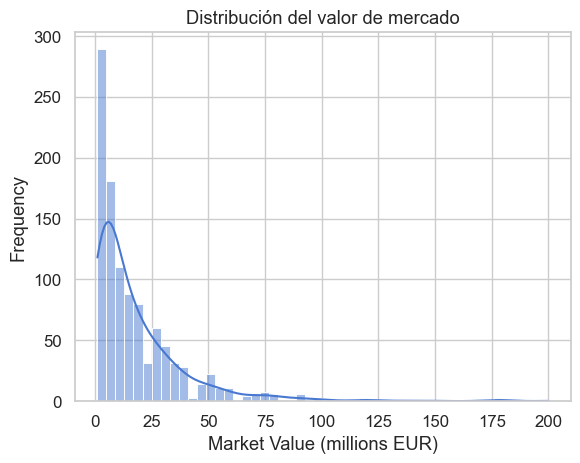

In [24]:
sns.histplot(df_player["market_value_million_eur"], bins=50, kde=True)
plt.xlabel("Market Value (millions EUR)")
plt.ylabel("Frequency")
plt.title("Distribución del valor de mercado")
plt.show()


Dado que la variable objetivo market_value_million_eur presentaba una distribución altamente sesgada, con la mayoría de jugadores concentrados en valores bajos y unos pocos con valores muy altos (outliers), se aplicó una transformación logarítmica (log1p). Esta transformación reduce la asimetría de la distribución, estabiliza la varianza y disminuye el efecto de los valores extremos, lo cual permite que el modelo de regresión lineal se ajuste de manera más adecuada.

In [25]:
import numpy as np
df_player["market_value_log"] = np.log1p(df_player["market_value_million_eur"])


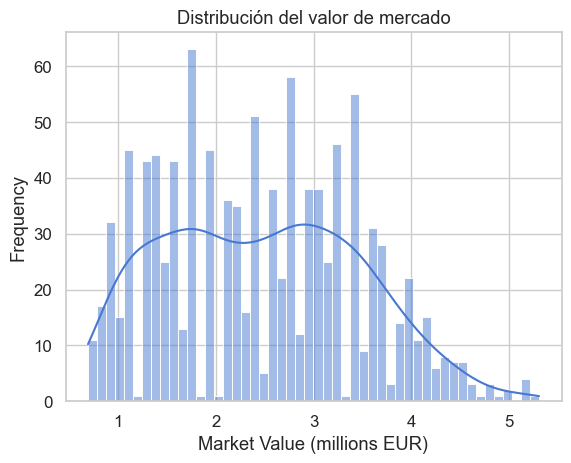

In [26]:

sns.histplot(df_player["market_value_log"], bins=50, kde=True)
plt.xlabel("Market Value (millions EUR)")
plt.ylabel("Frequency")
plt.title("Distribución del valor de mercado")
plt.show()

# Paso 4: Modelado de Regresión Lineal (Estudiante 1)
## 4.1 Construcción del Modelo Inicial


In [63]:
# Variables predictoras (X) y target (y)
X = df_player.drop(columns=["market_value_log"])
y = df_player["market_value_log"]

# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 0.5409635011344918
MAE: 0.4079832232981515
R²: 0.7128039787496111


### 4.1.1 Explica cómo implementaste la regresión lineal:
El modelo se implementó utilizando la librería scikit-learn (LinearRegression). Como variables predictoras se consideraron las métricas numéricas de rendimiento de los jugadores (goles, tiros, pases, regates, duelos, toques, etc.), junto con variables de edad y dummies de posición/nacionalidad. La variable objetivo fue el market_value_million_eur, es decir, el valor de mercado de cada jugador. Se dividieron los datos en conjuntos de entrenamiento y prueba con un split 70-30, para garantizar una evaluación en datos no vistos.
### 4.1.2 Parámetros clave del modelo:
El modelo inicial fue una regresión lineal sin regularización (modelo base de scikit-learn). No se aplicó validación cruzada (CV) ni penalizaciones tipo Ridge o Lasso, ya que el objetivo era obtener una línea base para comparar el desempeño de modelos más complejos en etapas posteriores.
## 4.2 Métricas de Calidad del Modelo
### 4.2.1 Resultados: RMSE, MAE, R², etc., con explicación.
- RMSE = 0.54 -> el error cuadrático medio muestra que, en promedio, las predicciones se desvían alrededor de 0.54 unidades logarítmicas respecto al valor real.

- MAE = 0.41 -> el error absoluto medio indica que el error típico ronda 0.41 unidades logarítmicas.

- R² = 0.71 -> el modelo explica aproximadamente 71% de la variabilidad en el valor de mercado de los jugadores.
### 4.2.2 Interpretación: ¿Qué significan esos resultados? ¿Buen ajuste, sobreajuste, etc.?
El R² = 0.71 indica que el modelo captura gran parte de la variabilidad del valor de mercado, mientras que los errores (RMSE y MAE) son relativamente bajos tras aplicar la transformación logarítmica al target. Esto sugiere que el ajuste es bueno y que el logaritmo permitió estabilizar la varianza y reducir el impacto de valores extremos. No se observa sobreajuste, ya que los resultados en el conjunto de prueba son consistentes, aunque aún podría haber margen de mejora con técnicas de regularización (Ridge, Lasso) o con modelos no lineales que capturen relaciones más complejas.

# Paso 5: Pipeline de Predicción y Exportación (15%) (Estudiante 1)
## 5.1 Definición y Justificación de las Transformaciones
Describe qué transformaciones incluiste en el pipeline: Scalers, codificadores, selectors…
Justificación: ¿Por qué cada paso? Ej.: “StandardScaler porque variables tienen diferentes escalas”.
## 5.2 Implementación del Pipeline (sklearn.pipeline)
Código de la construcción del pipeline paso a paso.
## 5.3 Entrenamiento y Validación en Pipeline
Resultados del modelo entrenado usando el pipeline (con las métricas correspondientes).
## 5.4 Exportación del Pipeline a .joblib
Código y explicación de cómo exportaste el modelo final.
Instrucciones simples para re-usar/el pipeline en otro entorno.

# Paso 6: Supuestos de la Regresión (10%) (Estudiante 2)
## 6.1 Chequeos Gráficos de Supuestos
Residuos vs. predicciones: Gráfica e interpretación.
Normalidad de residuos: Histograma, QQ plot.
Homoscedasticidad: Gráfica con la interpretación.
## 6.2 Discusión sobre Cumplimiento de Supuestos
¿Se cumplen o no? Para cada supuesto, argumenta con evidencia.

# Paso 7: Transformaciones para Cumplir Supuestos + Interpretación (15%) (Estudiante 2)
## 7.1 Transformaciones Complementarias
Qué nuevas transformaciones hiciste: log, BoxCox, eliminar outliers...
Por qué elegiste cada una.
## 7.2 Nuevo Ajuste y Evaluación del Modelo
Repetición del modelado y nuevas métricas.
## 7.3 Interpretación de Coeficientes
Explica en lenguaje sencillo qué significa un aumento de 1 unidad en cada predictor (las más relevantes).

# Paso 8: Presentación para FutAlpes F.C (10%) (Estudiante 3)
## 8.1 Creación de Diapositivas
Agrega enlace o adjunta archivo PDF/PPT.
## 8.2 Resultados Cuantitativos y Cualitativos
Muestra los resultados clave del mejor modelo (métricas, insights de variables importantes, etc).
## 8.3 Visualizaciones
Incluye gráficos relevantes (participa el notebook y/o la presentación).
## 8.4 Recomendaciones
Recomendaciones fundamentadas para la empresa a partir de los resultados.

# Paso 9: CSV de Predicciones y Métrica Final (5%)
## 9.1 Archivo CSV con Predicciones
Genera y guarda predicciones sobre los datos de prueba.
Explica la estructura y formato del archivo.
## 9.2 Reporte del RMSE (y posición en el ranking si corresponde)
Presenta el RMSE final sobre el test set y explica su relevancia.